
### Data understanding and cleaning

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset
leads = pd.read_csv(r"C:\Users\nidhi_000\Downloads\Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# Shape of dataset
leads.shape

(9240, 37)

In [5]:
# Description of dataset
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Entire information of dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# checking for Null values

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Checking the percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Now we will take care of null values in each column one by one.

leads['Lead Profile'].describe()

count       6531
unique         6
top       Select
freq        4146
Name: Lead Profile, dtype: object

In [10]:
# Replacing Lead profile nan values with Select

leads['Lead Profile'] = leads['Lead Profile'].replace(np.nan, 'Select')

In [11]:
# Dropiing the below columns as they have 45% null values.

leads = leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score','Lead Quality'],1)

In [12]:
# Checking the percentage of missing values again

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# As 'Tags' have 36% of missing values we can remove that column
#Tags is sales generated column, so dropping it

leads = leads.drop(columns = ['Tags'])

In [14]:
# What matters most to you in choosing a course description

leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [15]:
# Blanks in the this column may be imputed by 'Better Career Prospects'

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [16]:
# Occupation description

leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [17]:
# Most entries are of Unemployed so we can impute "Other" in it.

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Other')

In [18]:
# How did you hear about X Education
leads['How did you hear about X Education'].describe()

count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object

In [19]:
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace(np.nan,'Other')

In [20]:
# Country is India for most values so let's impute the same in missing values.

leads['Country'] = leads['Country'].replace(np.nan, 'India')

In [21]:
leads.Country.describe()

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object

In [22]:
# We can remove 'Country' as most of the values are India

leads = leads.drop(columns = ['Country'])

In [23]:
# City

leads.City.describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

In [24]:
# Most of the data is Mumbai so we can impute Mumbai in the missing values.

leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

In [25]:
# Specailization

leads.Specialization.describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

In [26]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
# Hence we can make a category "Others" for missing values.

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [27]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [28]:
# Rest missing values are under 2% so we can drop these rows.

leads.dropna(inplace = True)

In [29]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [30]:
#creating a new table having converted is 0 

leads_converted_cold = leads[leads.Converted == 0]
leads_converted_cold.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API   
7  20ef72a2-fb3b-45e0-924e-551c5fa59095       660664                      API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
3  Direct Traffic           No          No          0          1.0   
5      Olark Chat           No          No          0          0.0   
7      Olark Chat           No          No          0          0.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
3                          305                   1.0  ...   
5                            0                   0.0  ...   
7                            0                   0.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
3                    No                      No   
5                    No                      No   
7                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
3                                     No                                No   
5                                     No                                No   
7                                     No                                No   

  Get updates on DM Content Lead Profile    City  \
0                        No       Select  Select   
1                        No       Select  Select   
3                        No       Select  Mumbai   
5                        No       Select  Mumbai   
7                        No       Select  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
3                                       No   
5                                       No   
7                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
3                                     No              Modified  
5                                     No              Modified  
7                                     No              Modified  

[5 rows x 30 columns]

In [31]:
#creating a new table having converted is 1

leads_converted_hot = leads[leads.Converted == 1]
leads_converted_hot.head()

Prospect ID  Lead Number  \
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   

                Lead Origin     Lead Source Do Not Email Do Not Call  \
2   Landing Page Submission  Direct Traffic           No          No   
4   Landing Page Submission          Google           No          No   
6   Landing Page Submission          Google           No          No   
10  Landing Page Submission  Organic Search           No          No   
11  Landing Page Submission  Direct Traffic           No          No   

    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2           1          2.0                         1532                  2.00   
4           1          2.0                         1428                  1.00   
6           1          2.0                         1640                  2.00   
10          1          8.0                         1351                  8.00   
11          1          8.0                         1343                  2.67   

    ... Digital Advertisement Through Recommendations  \
2   ...                    No                      No   
4   ...                    No                      No   
6   ...                    No                      No   
10  ...                    No                      No   
11  ...                    No                      No   

   Receive More Updates About Our Courses Update me on Supply Chain Content  \
2                                      No                                No   
4                                      No                                No   
6                                      No                                No   
10                                     No                                No   
11                                     No                                No   

   Get updates on DM Content    Lead Profile                City  \
2                         No  Potential Lead              Mumbai   
4                         No          Select              Mumbai   
6                         No  Potential Lead              Mumbai   
10                        No          Select  Other Metro Cities   
11                        No          Select   Thane & Outskirts   

   I agree to pay the amount through cheque  \
2                                        No   
4                                        No   
6                                        No   
10                                       No   
11                                       No   

   A free copy of Mastering The Interview    Last Notable Activity  
2                                     Yes             Email Opened  
4                                      No                 Modified  
6                                      No                 Modified  
10                                    Yes             Email Opened  
11                                    Yes  Page Visited on Website  

[5 rows x 30 columns]

In [32]:
leads_converted_cold.shape

(5639, 30)

In [33]:
leads_converted_hot.shape

(3435, 30)

In [34]:
leads.shape

(9074, 30)

In [35]:
leads['Lead Number'].unique().shape

(9074,)

In [36]:
leads.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     20
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [37]:
#drop column 'Prospect ID' as 'Prospect ID' and 'Lead Number' explains same
#dropping 6 other columns as they have only single unique value and it explains nothing other than keyword 'No'
leads = leads.drop(columns = ['Prospect ID','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

In [38]:
leads.shape

(9074, 24)

In [39]:
#counting number of columns in following columns in 'the dataframe

print(leads['Do Not Email'].value_counts())
print(leads['Do Not Call'].value_counts())
print(leads['Search'].value_counts())
print(leads['Newspaper Article'].value_counts())
print(leads['X Education Forums'].value_counts())
print(leads['Newspaper'].value_counts())
print(leads['Digital Advertisement'].value_counts())
print(leads['Through Recommendations'].value_counts())
print(leads['A free copy of Mastering The Interview'].value_counts())
print(leads['What is your current occupation'].value_counts())
print(leads['What matters most to you in choosing a course'].value_counts())
print(leads['How did you hear about X Education'].value_counts())

No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
No     9060
Yes      14
Name: Search, dtype: int64
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
No     9073
Yes       1
Name: X Education Forums, dtype: int64
No     9073
Yes       1
Name: Newspaper, dtype: int64
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
Unemployed              5476
Other                   2698
Working Professional     677
Student                  206
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64
Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64
Select                   4886
Other           

Except 'A free copy of Mastering The Interview' all other columns above are having 'No' values greater than 99%.Since these columns gives no information in prediction,droping the same is preffered

In [40]:
# Dropping the columns which are highly skewed.
leads = leads.drop(columns = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
                              'Digital Advertisement','Through Recommendations','What matters most to you in choosing a course'])

In [41]:
leads.shape

(9074, 15)

In [42]:
leads.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

     Lead Profile    City A free copy of Mastering The Interview  \
0          Select  Select                                     No   
1          Select  Select                                     No   
2  Potential Lead  Mumbai                                    Yes   
3          Select  Mumbai                                     No   
4          Select  Mumbai                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

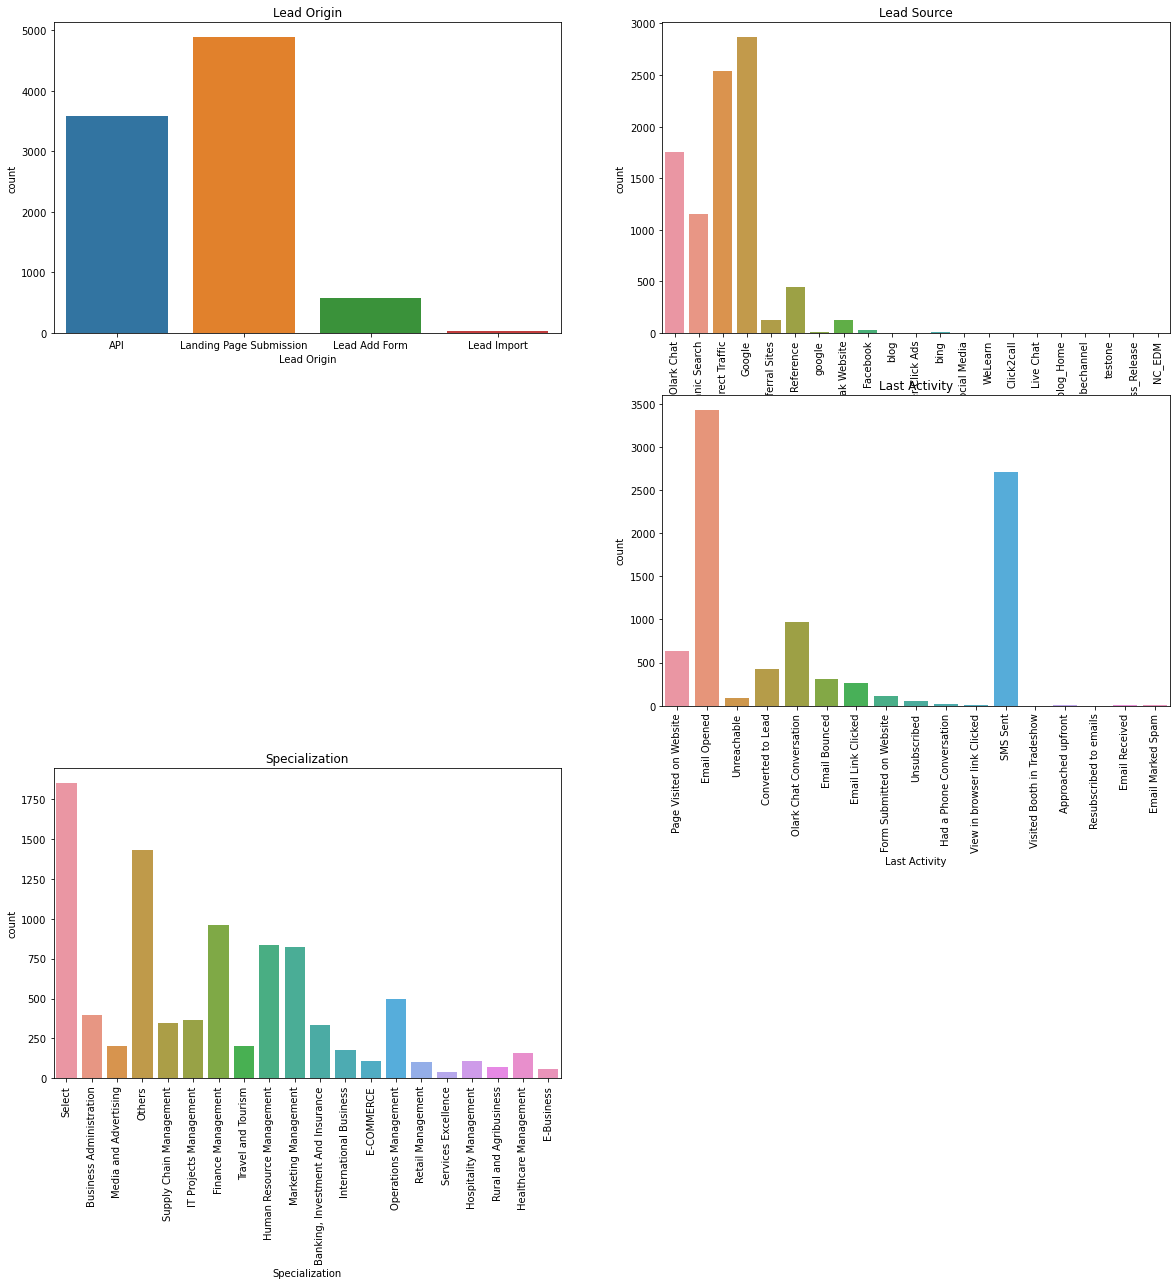

In [43]:
# plotting for categorical variable
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(6,2,4)
sns.countplot(leads['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(6,2,5)
sns.countplot(leads['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.show()

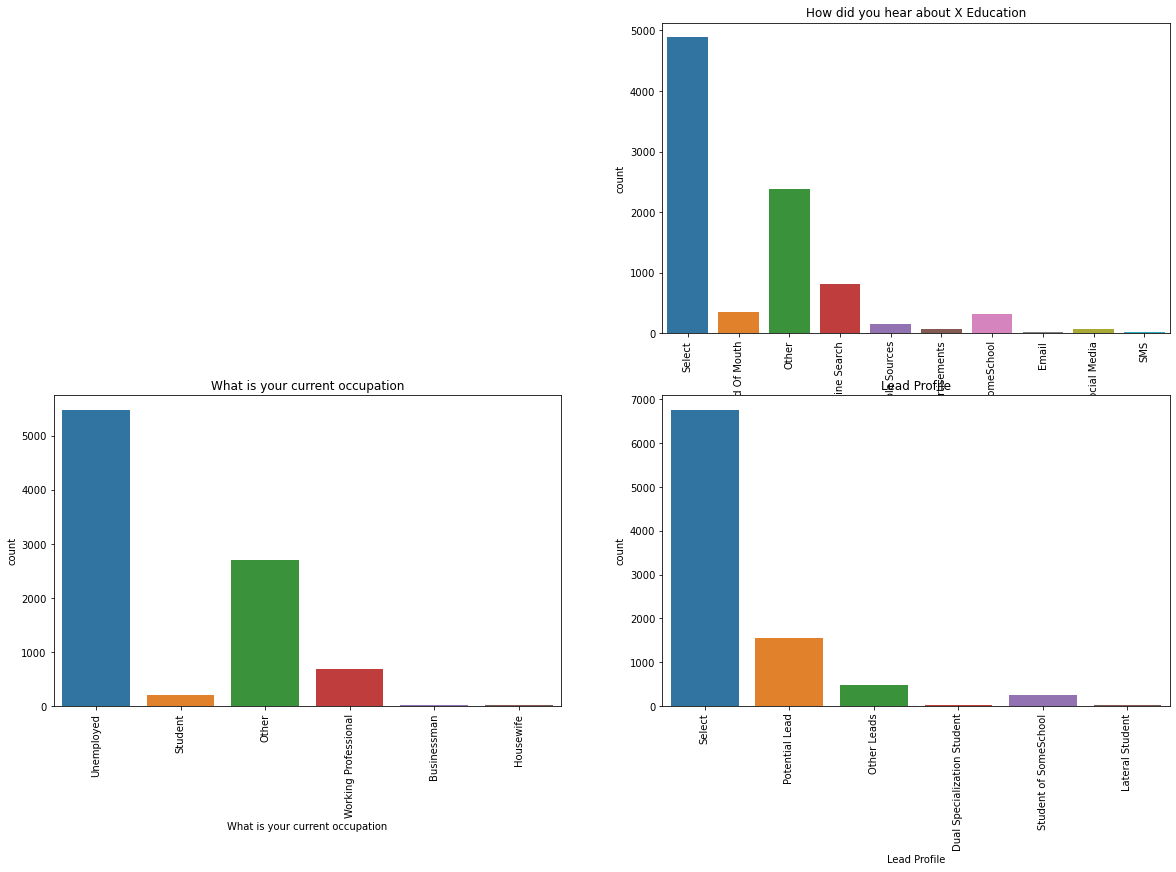

In [44]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,6)
sns.countplot(leads['How did you hear about X Education']).tick_params(axis='x', rotation = 90)
plt.title('How did you hear about X Education')

plt.subplot(6,2,7)
sns.countplot(leads['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(6,2,8)
sns.countplot(leads['Lead Profile']).tick_params(axis='x', rotation = 90)
plt.title('Lead Profile')

plt.show()

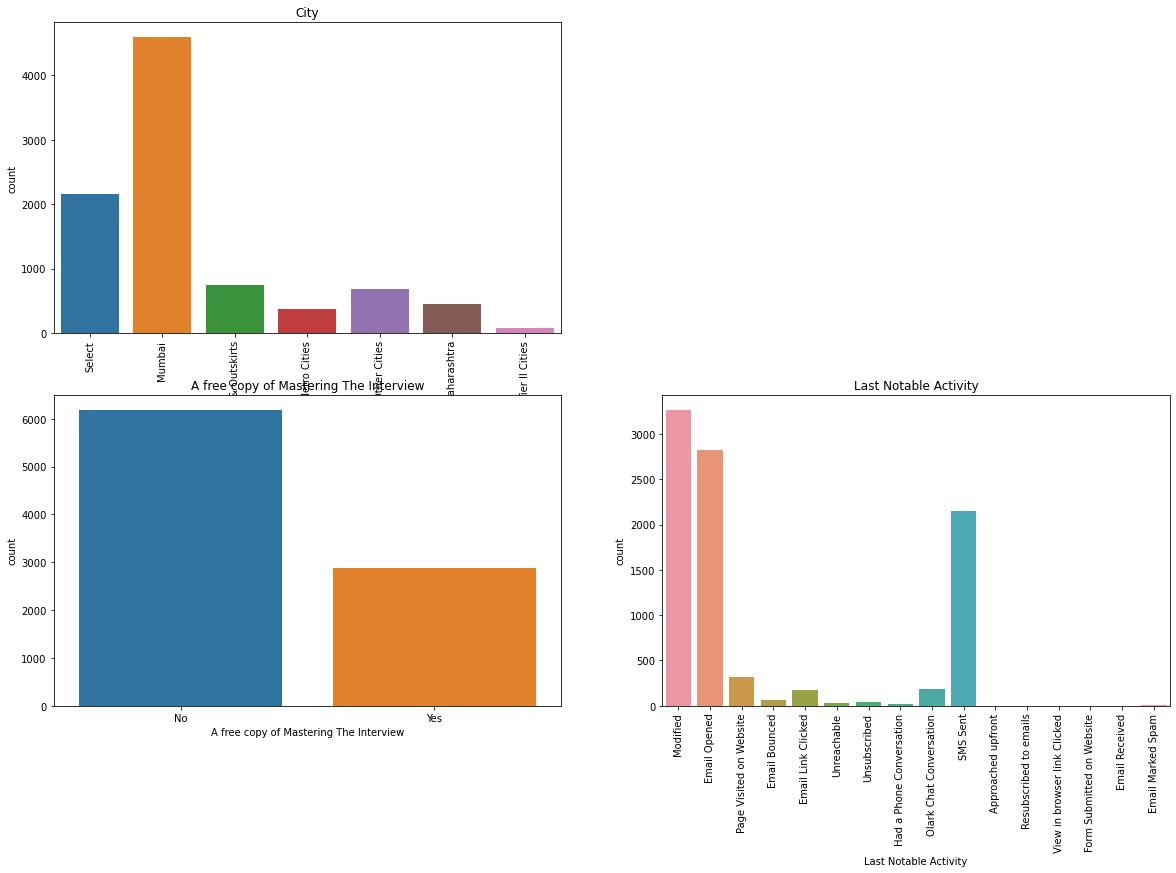

In [45]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,9)
sns.countplot(leads['City']).tick_params(axis='x', rotation = 90)
plt.title('City')

plt.subplot(6,2,11)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

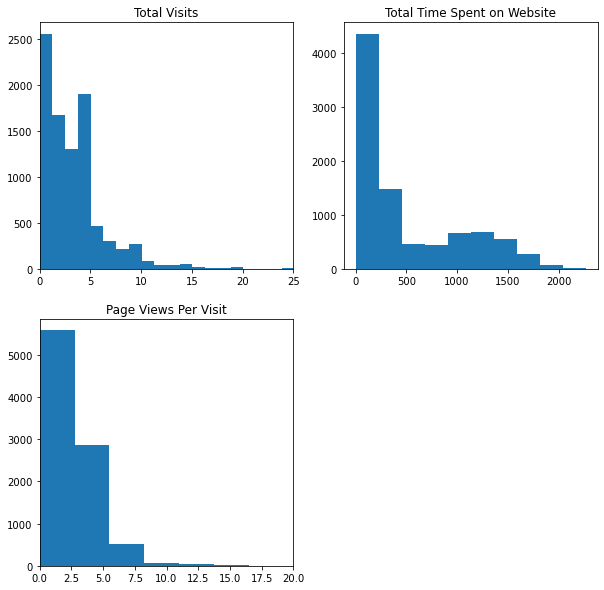

In [46]:
# plotting for numerical variables
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Data Preparation

##### Converting some binary variables (Yes/No) to 0/1

In [47]:
# Converting Yes to 1 and No to 0

leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [48]:
# creating dummy variables for categorical value

cont = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','How did you hear about X Education', 'Specialization','What is your current occupation','City','Lead Profile','A free copy of Mastering The Interview','Last Notable Activity']],drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,cont],axis=1)

In [49]:
leads.columns
leads.shape

(9074, 114)

In [50]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=114)

In [51]:
#dropping variables from which columns had 'select' keyword

leads = leads.drop(columns = ['Specialization_Select','Lead Profile_Select','City_Select','How did you hear about X Education_Select'])

In [52]:
leads.shape

(9074, 110)

In [53]:
#created dummies for the below variables, so drop the same

leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Lead Profile','City','A free copy of Mastering The Interview','Last Notable Activity','How did you hear about X Education'],axis = 1)

In [54]:
leads.shape

(9074, 99)

In [55]:
leads.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Source_Direct Traffic  Lead Source_Facebook  ...  \
0                           0                     0  ...   
1                           0                     0  ...   
2                           1                     0  ...   
3                           1                     0  ...   
4                           0                     0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last

In [56]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 99 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Lead Number                                               9074 non-null   int64  
 1   Converted                                                 9074 non-null   int64  
 2   TotalVisits                                               9074 non-null   float64
 3   Total Time Spent on Website                               9074 non-null   int64  
 4   Page Views Per Visit                                      9074 non-null   float64
 5   Lead Origin_Landing Page Submission                       9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                                 9074 non-null   uint8  
 7   Lead Origin_Lead Import                                   9074 non-null   uint8  
 8   Lead Source_Direct

In [57]:
# Checking for outliers in the continuous variables

num_leads = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [58]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

In [59]:
# Removing the outlier in 'Page view per vist'

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

### Test-Train Split

In [60]:
# Importing more modules
import seaborn as sns
%matplotlib inline

# To Scale the data
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [61]:
# Putting feature variable to X

X = leads.drop(['Lead Number','Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                

In [62]:
# Putting response variable to y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [64]:
#scaling continuous variables in the dataset

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771    -0.706169                    -0.878952             -1.279293   
1722    -0.269663                     0.603330             -0.081906   
6385     0.166842                    -0.502441              1.115481   
8169     0.166842                    -0.575550              1.115481   
5543     0.821601                    -0.566412              0.816134   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
1722                                    1                          0   
6385                                    1                          0   
8169                                    1                          0   
5543                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
4771                        0                           0   
1722                        0                           1   
6385                        0                           0   
8169                        0                           0   
5543                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
4771                     0                   0                      0  ...   
1722                     0                   0                      0  ...   
6385                     0                   0                      0  ...   
8169                     0                   1                      0  ...   
5543                     0                   1                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
4771                                                0   
1722                                                0   
6385                                                0   
8169                                                0   
5543                                                0   

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
1722                                               0   
6385                                               0   
8169                                               0   
5543                                               0   

      Last Notable Activity_Modified  \
4771                               0   
1722                               0   
6385                               0   
8169                               0   
5543                               0   

      Last Notable Activity_Olark Chat Conversation  \
4771                                              0   
1722                                              0   
6385                                              0   
8169                                              0   
5543                                              0   

      Last Notable Activity_Page Visited on Website  \
4771                                              0   
1722                                              0   
6385                                              0   
8169                                              0   
5543                                              1   

      Last Notable Activity_Resubscribed to emails  \
4771                                             0   
1722                                             0   
6385                                             0   
8169                                             0   
5543                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
4771                               1                                  0   
1722                               0                                  0   
6385                               0                                  0   
8169                               1                                  0   
5543                 

In [65]:
# Checking the Converted Rate

converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.85517873510541

##### We almost have 38% conversion rate

### Looking at Correlations

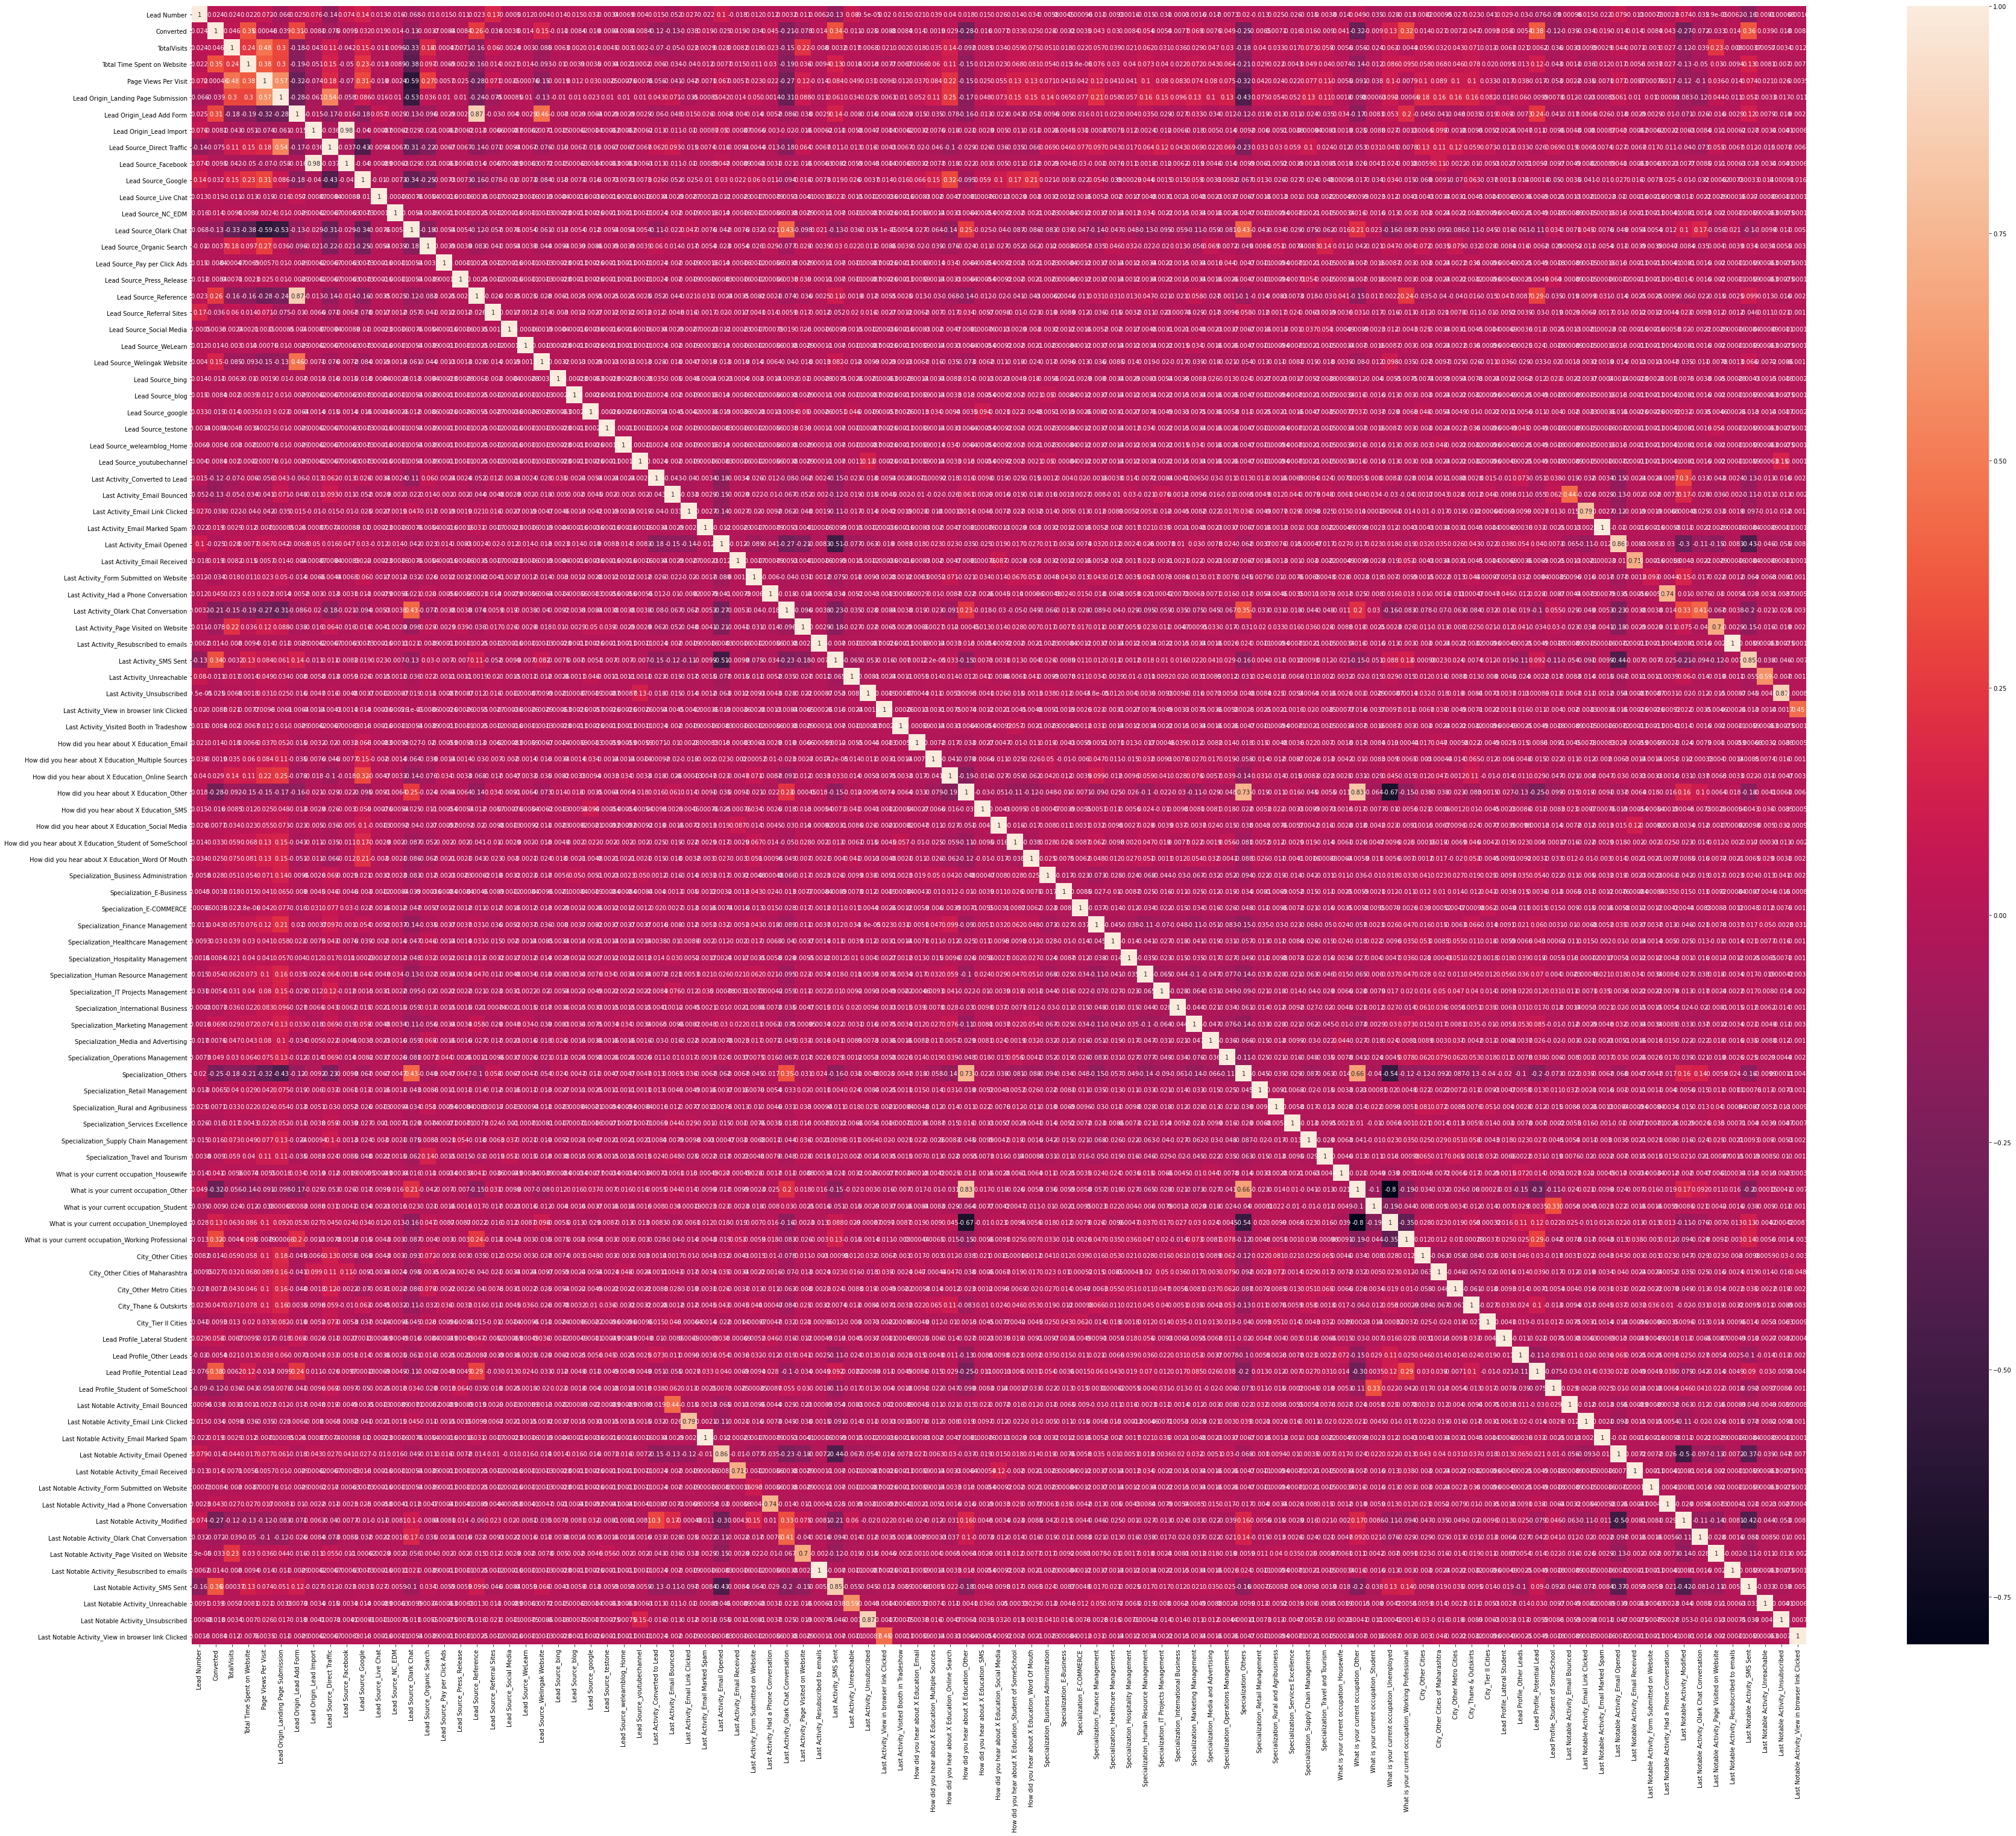

In [66]:
# Let's see the correlation matrix 

plt.figure(figsize = (60,50))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Model Building

###### Running the First Training Model

In [67]:
import statsmodels.api as sm

In [68]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6016
Model Family:                Binomial   Df Model:                           92
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 13 Jun 2021   Deviance:                          nan
Time:                        08:57:15   Pearson chi2:                 5.82e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      1.21e+16   1.08e+08   1.12e+08      0.000    1.21e+16    1.21e+16
TotalVisits                                               1.159e+14      1e+06   1.16e+08      0.000    1.16e+14    1.16e+14
Total Time Spent on Website                               3.314e+14   1.01e+06   3.29e+08      0.000    3.31e+14    3.31e+14
Page Views Per Visit                                     -1.532e+13   1.43e+06  -1.07e+07      0.000   -1.53e+13   -1.53e+13
Lead Origin_Landing Page Submission                       1.618e+13   3.54e+06   4.57e+06      0.000    1.62e+13    1.62e+13
Lead Origin_Lead Add Form                                 -3.31e+15   6.73e+07  -4.92e+07      0.000   -3.31e+15   -3.31e+15
Lead Origin_Lead Import                                   3.876e+15   6.93e+07   5.59e+07      0.000    3.88e+15    3.88e+15
Lead Source_Direct Traffic                               -3.503e+15   7.53e+07  -4.65e+07      0.000    -3.5e+15    -3.5e+15
Lead Source_Facebook                                     -7.928e+15   1.01e+08  -7.84e+07      0.000   -7.93e+15   -7.93e+15
Lead Source_Google                                       -3.491e+15   7.52e+07  -4.64e+07      0.000   -3.49e+15   -3.49e+15
Lead Source_Live Chat                                     5.203e+15   5.83e+07   8.92e+07      0.000     5.2e+15     5.2e+15
Lead Source_NC_EDM                                          33.3215   1.85e-06   1.81e+07      0.000      33.321      33.321
Lead Source_Olark Chat                                   -3.068e+15   7.52e+07  -4.08e+07      0.000   -3.07e+15   -3.07e+15
Lead Source_Organic Search                               -3.533e+15   7.53e+07  -4.69e+07      0.000   -3.53e+15   -3.53e+15
Lead Source_Pay per Click Ads                            -6.976e+15   1.01e+08  -6.91e+07      0.000   -6.98e+15   -6.98e+15
Lead Source_Press_Release                                 -6.56e+15   1.01e+08  -6.48e+07      0.000   -6.56e+15   -6.56e+15
Lead Source_Reference                                     7.534e+14   3.39e+07   2.22e+07      0.000    7.53e+14    7.53e+14
Lead Source_Referral Sites                               -3.794e+15   7.56e+07  -5.02e+07      0.000   -3.79e+15   -3.79e+15
Lead Source_Social Media                                  -2.93e+15   8.91e+07  -3.29e+07      0.000   -2.93e+15   -2.93e+15
Lead Source_WeLearn                                       6.681e+14   1.01e+08   6.61e+06      0.000    6.68e+14    6.68e+14
Lead Source_Welingak Website                              2.562e+15   3.45e+07   7.42e+07      0.000    2.56e+15    2.56e+15
Lead Source_bing                                         -3.421e+15    8.1e+07  -4.

### Feature Selection Using RFE

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 26),
 ('Lead Source_NC_EDM', False, 76),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 72),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Social Media', False, 34),
 ('Lead Source_WeLearn', False, 56),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_blog', False, 46),
 ('Lead Source_google', False, 17),
 ('Lead Source_testone', False, 77),
 ('Lead Source_welearnblog_Home', False, 48),


In [73]:
col = X_train.columns[rfe.support_]

In [74]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_Vie

###### Assessing the model with StatsModels

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6088
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2332.5
Date:                Sun, 13 Jun 2021   Deviance:                       4665.0
Time:                        08:57:46   Pearson chi2:                 6.24e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4674      0.115    -12.740      0.000      -1.693      -1.242
Total Time Spent on Website                              1.1127      0.043     25.969      0.000       1.029       1.197
Lead Origin_Lead Add Form                                1.5040      0.862      1.745      0.081      -0.185       3.193
Lead Source_Olark Chat                                   1.2679      0.108     11.782      0.000       1.057       1.479
Lead Source_Reference                                    1.6944      0.892      1.900      0.057      -0.053       3.442
Lead Source_Welingak Website                             4.5797      1.326      3.454      0.001       1.981       7.179
Last Activity_Email Bounced                             -1.2898      0.358     -3.600      0.000      -1.992      -0.588
Last Activity_Email Opened                               1.1201      0.166      6.734      0.000       0.794       1.446
Last Activity_Had a Phone Conversation                   1.8468      1.077      1.714      0.087      -0.265       3.959
Last Activity_Resubscribed to emails                    25.6819   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_SMS Sent                                   1.5248      0.113     13.457      0.000       1.303       1.747
What is your current occupation_Housewife               24.2203   2.52e+04      0.001      0.999   -4.94e+04    4.95e+04
What is your current occupation_Other                   -0.9383      0.093    -10.071      0.000      -1.121      -0.756
What is your current occupation_Working Professional     2.1069      0.195     10.782      0.000       1.724       2.490
Lead Profile_Lateral Student                            23.3794   1.89e+04      0.001      0.999    -3.7e+04    3.71e+04
Lead Profile_Potential Lead                              1.5348      0.105     14.598      0.000       1.329       1.741
Lead Profile_Student of SomeSchool                      -1.9584      0.411     -4.759      0.000      -2.765      -1.152
Last Notable Activity_Email Opened                      -0.9418      0.189     -4.971      0.000      -1.313      -0.570
Last Notable Activity_Had a Phone Conversation          21.0553   2.23e+04      0.001      0.999   -4.37e+04    4.38e+04
Last Notable Activity_Modified                          -1.0054      0.113     -8.899      0.000      -1.227      -0.784
Last Notable Activity_Unreachable                        1.4542      0.569      2.556      0.011       0.339       2.569
========================================================================================================================
"""

In [76]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4771    0.997321
1722    0.815945
6385    0.136081
8169    0.358217
5543    0.045825
6213    0.125913
3384    0.954418
776     0.165034
7827    0.085471
5352    0.050255
dtype: float64

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred = y_train_pred * 100
y_train_pred[:10]

array([99.73206971, 81.59445642, 13.60809077, 35.82167163,  4.58246287,
       12.59126622, 95.44183529, 16.50337445,  8.54713056,  5.02547561])

###### Creating a dataframe with the actual churn flag and the predicted probabilities

In [78]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID
0           1        99.732070    4771
1           1        81.594456    1722
2           0        13.608091    6385
3           0        35.821672    8169
4           0         4.582463    5543

###### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [79]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted
0           1        99.732070    4771          1
1           1        81.594456    1722          1
2           0        13.608091    6385          1
3           0        35.821672    8169          1
4           0         4.582463    5543          1

In [80]:
from sklearn import metrics

In [81]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[  40 3737]
 [   1 2331]]


In [82]:
# Predicted     not_churn    churn
# Actual
# not_churn        34        3743
# churn             1        2331

In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.3881158945817646


##### Checking VIFs

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                           Lead Origin_Lead Add Form  57.32
3                               Lead Source_Reference  44.60
4                        Lead Source_Welingak Website  13.75
6                          Last Activity_Email Opened   7.22
16                 Last Notable Activity_Email Opened   7.08
7              Last Activity_Had a Phone Conversation   2.54
17     Last Notable Activity_Had a Phone Conversation   2.53
18                     Last Notable Activity_Modified   1.80
11              What is your current occupation_Other   1.64
2                              Lead Source_Olark Chat   1.50
14                        Lead Profile_Potential Lead   1.50
9                              Last Activity_SMS Sent   1.33
0                         Total Time Spent on Website   1.32
12  What is your current occupation_Working Profes...   1.24
5                         Last Activity_Email Bounced   1.10
15                 Lead Profile_Student of SomeSchool   1.06
13                       Lead Profile_Lateral Student   1.03
10          What is your current occupation_Housewife   1.01
19                  Last Notable Activity_Unreachable   1.01
8                Last Activity_Resubscribed to emails   1.00

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.
So let's start by dropping that variables.

In [86]:
# Lead Origin_Lead Add Form havs high VIF so dropping the column
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [87]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6089
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2334.2
Date:                Sun, 13 Jun 2021   Deviance:                       4668.4
Time:                        08:57:49   Pearson chi2:                 6.24e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4626      0.115    -12.715      0.000      -1.688      -1.237
Total Time Spent on Website                              1.1102      0.043     25.941      0.000       1.026       1.194
Lead Source_Olark Chat                                   1.2643      0.108     11.756      0.000       1.054       1.475
Lead Source_Reference                                    3.1902      0.245     13.006      0.000       2.709       3.671
Lead Source_Welingak Website                             6.0770      1.011      6.011      0.000       4.095       8.059
Last Activity_Email Bounced                             -1.2914      0.358     -3.605      0.000      -1.994      -0.589
Last Activity_Email Opened                               1.1263      0.166      6.778      0.000       0.801       1.452
Last Activity_Had a Phone Conversation                   1.8463      1.077      1.714      0.087      -0.265       3.958
Last Activity_Resubscribed to emails                    25.6812   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_SMS Sent                                   1.5243      0.113     13.465      0.000       1.302       1.746
What is your current occupation_Housewife               24.2155   2.52e+04      0.001      0.999   -4.94e+04    4.95e+04
What is your current occupation_Other                   -0.9411      0.093    -10.106      0.000      -1.124      -0.759
What is your current occupation_Working Professional     2.1020      0.195     10.759      0.000       1.719       2.485
Lead Profile_Lateral Student                            23.3758   1.89e+04      0.001      0.999    -3.7e+04    3.71e+04
Lead Profile_Potential Lead                              1.5393      0.105     14.644      0.000       1.333       1.745
Lead Profile_Student of SomeSchool                      -1.9604      0.411     -4.767      0.000      -2.766      -1.154
Last Notable Activity_Email Opened                      -0.9473      0.189     -5.005      0.000      -1.318      -0.576
Last Notable Activity_Had a Phone Conversation          21.0489   2.23e+04      0.001      0.999   -4.37e+04    4.38e+04
Last Notable Activity_Modified                          -1.0082      0.113     -8.931      0.000      -1.230      -0.787
Last Notable Activity_Unreachable                        1.4508      0.569      2.550      0.011       0.336       2.566
========================================================================================================================
"""

In [88]:
#Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                          Last Activity_Email Opened  7.22
15                 Last Notable Activity_Email Opened  7.08
6              Last Activity_Had a Phone Conversation  2.54
16     Last Notable Activity_Had a Phone Conversation  2.53
17                     Last Notable Activity_Modified  1.80
10              What is your current occupation_Other  1.64
1                              Lead Source_Olark Chat  1.50
13                        Lead Profile_Potential Lead  1.50
8                              Last Activity_SMS Sent  1.33
0                         Total Time Spent on Website  1.32
2                               Lead Source_Reference  1.32
11  What is your current occupation_Working Profes...  1.24
4                         Last Activity_Email Bounced  1.10
3                        Lead Source_Welingak Website  1.06
14                 Lead Profile_Student of SomeSchool  1.06
12                       Lead Profile_Lateral Student  1.03
9           What is your current occupation_Housewife  1.01
18                  Last Notable Activity_Unreachable  1.01
7                Last Activity_Resubscribed to emails  1.00

In [89]:
#drop column having high p value 'Last Activity_Resubscribed to emails'
col = col.drop('Last Activity_Resubscribed to emails', 1)

In [90]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6090
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2336.4
Date:                Sun, 13 Jun 2021   Deviance:                       4672.8
Time:                        08:57:51   Pearson chi2:                 6.24e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4548      0.115    -12.668      0.000      -1.680      -1.230
Total Time Spent on Website                              1.1097      0.043     25.937      0.000       1.026       1.194
Lead Source_Olark Chat                                   1.2684      0.107     11.802      0.000       1.058       1.479
Lead Source_Reference                                    3.1910      0.245     13.009      0.000       2.710       3.672
Lead Source_Welingak Website                             6.0785      1.011      6.012      0.000       4.097       8.060
Last Activity_Email Bounced                             -1.2965      0.358     -3.620      0.000      -1.999      -0.595
Last Activity_Email Opened                               1.1231      0.166      6.763      0.000       0.798       1.449
Last Activity_Had a Phone Conversation                   1.8443      1.077      1.712      0.087      -0.267       3.955
Last Activity_SMS Sent                                   1.5160      0.113     13.412      0.000       1.294       1.738
What is your current occupation_Housewife               24.2165   2.52e+04      0.001      0.999   -4.94e+04    4.95e+04
What is your current occupation_Other                   -0.9359      0.093    -10.064      0.000      -1.118      -0.754
What is your current occupation_Working Professional     2.1020      0.195     10.760      0.000       1.719       2.485
Lead Profile_Lateral Student                            23.3772   1.89e+04      0.001      0.999    -3.7e+04    3.71e+04
Lead Profile_Potential Lead                              1.5397      0.105     14.649      0.000       1.334       1.746
Lead Profile_Student of SomeSchool                      -1.9620      0.411     -4.771      0.000      -2.768      -1.156
Last Notable Activity_Email Opened                      -0.9538      0.189     -5.042      0.000      -1.325      -0.583
Last Notable Activity_Had a Phone Conversation          21.0427   2.23e+04      0.001      0.999   -4.37e+04    4.38e+04
Last Notable Activity_Modified                          -1.0154      0.113     -9.003      0.000      -1.236      -0.794
Last Notable Activity_Unreachable                        1.4398      0.569      2.532      0.011       0.325       2.554
========================================================================================================================
"""

In [91]:
#Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                          Last Activity_Email Opened  7.22
14                 Last Notable Activity_Email Opened  7.08
6              Last Activity_Had a Phone Conversation  2.54
15     Last Notable Activity_Had a Phone Conversation  2.53
16                     Last Notable Activity_Modified  1.80
9               What is your current occupation_Other  1.63
1                              Lead Source_Olark Chat  1.50
12                        Lead Profile_Potential Lead  1.50
7                              Last Activity_SMS Sent  1.33
0                         Total Time Spent on Website  1.32
2                               Lead Source_Reference  1.32
10  What is your current occupation_Working Profes...  1.24
4                         Last Activity_Email Bounced  1.10
13                 Lead Profile_Student of SomeSchool  1.06
3                        Lead Source_Welingak Website  1.06
11                       Lead Profile_Lateral Student  1.03
8           What is your current occupation_Housewife  1.01
17                  Last Notable Activity_Unreachable  1.01

In [92]:
#drop column having high p value 'Lead Profile_Lateral Student'
col = col.drop('Lead Profile_Lateral Student', 1)

In [93]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6091
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.6
Date:                Sun, 13 Jun 2021   Deviance:                       4687.2
Time:                        08:57:53   Pearson chi2:                 6.26e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4482      0.115    -12.617      0.000      -1.673      -1.223
Total Time Spent on Website                              1.1105      0.043     26.011      0.000       1.027       1.194
Lead Source_Olark Chat                                   1.2646      0.107     11.792      0.000       1.054       1.475
Lead Source_Reference                                    3.2435      0.246     13.205      0.000       2.762       3.725
Lead Source_Welingak Website                             6.1130      1.011      6.048      0.000       4.132       8.094
Last Activity_Email Bounced                             -1.2995      0.358     -3.630      0.000      -2.001      -0.598
Last Activity_Email Opened                               1.1387      0.165      6.899      0.000       0.815       1.462
Last Activity_Had a Phone Conversation                   2.0040      1.020      1.965      0.049       0.005       4.003
Last Activity_SMS Sent                                   1.5118      0.113     13.378      0.000       1.290       1.733
What is your current occupation_Housewife               24.1978   2.52e+04      0.001      0.999   -4.93e+04    4.94e+04
What is your current occupation_Other                   -0.9453      0.093    -10.176      0.000      -1.127      -0.763
What is your current occupation_Working Professional     2.0945      0.195     10.727      0.000       1.712       2.477
Lead Profile_Potential Lead                              1.5258      0.105     14.534      0.000       1.320       1.732
Lead Profile_Student of SomeSchool                      -1.9751      0.412     -4.799      0.000      -2.782      -1.168
Last Notable Activity_Email Opened                      -0.9613      0.188     -5.104      0.000      -1.330      -0.592
Last Notable Activity_Had a Phone Conversation          20.8862   2.23e+04      0.001      0.999   -4.37e+04    4.38e+04
Last Notable Activity_Modified                          -1.0117      0.113     -8.971      0.000      -1.233      -0.791
Last Notable Activity_Unreachable                        1.4408      0.569      2.533      0.011       0.326       2.556
========================================================================================================================
"""

In [94]:
#drop column havign high p value (here 'What is your current occupation_Housewife')
col = col.drop('What is your current occupation_Housewife', 1)

In [95]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6092
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2350.0
Date:                Sun, 13 Jun 2021   Deviance:                       4700.1
Time:                        08:57:53   Pearson chi2:                 6.27e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4407      0.115    -12.566      0.000      -1.665      -1.216
Total Time Spent on Website                              1.1093      0.043     26.020      0.000       1.026       1.193
Lead Source_Olark Chat                                   1.2578      0.107     11.745      0.000       1.048       1.468
Lead Source_Reference                                    3.2545      0.245     13.267      0.000       2.774       3.735
Lead Source_Welingak Website                             6.1033      1.011      6.038      0.000       4.122       8.084
Last Activity_Email Bounced                             -1.3050      0.358     -3.647      0.000      -2.006      -0.604
Last Activity_Email Opened                               1.1383      0.165      6.917      0.000       0.816       1.461
Last Activity_Had a Phone Conversation                   1.9941      1.020      1.955      0.051      -0.005       3.993
Last Activity_SMS Sent                                   1.5066      0.113     13.342      0.000       1.285       1.728
What is your current occupation_Other                   -0.9516      0.093    -10.253      0.000      -1.134      -0.770
What is your current occupation_Working Professional     2.0870      0.195     10.694      0.000       1.705       2.469
Lead Profile_Potential Lead                              1.5205      0.105     14.504      0.000       1.315       1.726
Lead Profile_Student of SomeSchool                      -1.9831      0.412     -4.819      0.000      -2.790      -1.177
Last Notable Activity_Email Opened                      -0.9563      0.188     -5.090      0.000      -1.325      -0.588
Last Notable Activity_Had a Phone Conversation          19.8930   1.35e+04      0.001      0.999   -2.65e+04    2.66e+04
Last Notable Activity_Modified                          -1.0068      0.113     -8.934      0.000      -1.228      -0.786
Last Notable Activity_Unreachable                        1.4389      0.569      2.530      0.011       0.324       2.554
========================================================================================================================
"""

In [96]:
#Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                          Last Activity_Email Opened  7.19
12                 Last Notable Activity_Email Opened  7.08
6              Last Activity_Had a Phone Conversation  2.51
13     Last Notable Activity_Had a Phone Conversation  2.51
14                     Last Notable Activity_Modified  1.80
8               What is your current occupation_Other  1.63
1                              Lead Source_Olark Chat  1.50
10                        Lead Profile_Potential Lead  1.50
7                              Last Activity_SMS Sent  1.33
0                         Total Time Spent on Website  1.32
2                               Lead Source_Reference  1.31
9   What is your current occupation_Working Profes...  1.24
4                         Last Activity_Email Bounced  1.10
11                 Lead Profile_Student of SomeSchool  1.06
3                        Lead Source_Welingak Website  1.05
15                  Last Notable Activity_Unreachable  1.01

In [97]:
#drop column havign high vif value (here 'Last Notable Activity_Email Opened')
col = col.drop('Last Notable Activity_Email Opened', 1)

In [98]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6093
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.7
Date:                Sun, 13 Jun 2021   Deviance:                       4725.4
Time:                        08:57:54   Pearson chi2:                 6.21e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6505      0.109    -15.193      0.000      -1.863      -1.438
Total Time Spent on Website                              1.1079      0.042     26.089      0.000       1.025       1.191
Lead Source_Olark Chat                                   1.2761      0.107     11.937      0.000       1.067       1.486
Lead Source_Reference                                    3.2717      0.245     13.350      0.000       2.791       3.752
Lead Source_Welingak Website                             6.1008      1.011      6.033      0.000       4.119       8.083
Last Activity_Email Bounced                             -1.2818      0.356     -3.604      0.000      -1.979      -0.585
Last Activity_Email Opened                               0.4931      0.109      4.534      0.000       0.280       0.706
Last Activity_Had a Phone Conversation                   1.8772      1.021      1.839      0.066      -0.123       3.877
Last Activity_SMS Sent                                   1.6520      0.110     15.035      0.000       1.437       1.867
What is your current occupation_Other                   -0.9670      0.093    -10.446      0.000      -1.148      -0.786
What is your current occupation_Working Professional     2.0830      0.194     10.723      0.000       1.702       2.464
Lead Profile_Potential Lead                              1.5250      0.105     14.555      0.000       1.320       1.730
Lead Profile_Student of SomeSchool                      -2.0055      0.413     -4.852      0.000      -2.816      -1.195
Last Notable Activity_Had a Phone Conversation          20.2142   1.35e+04      0.001      0.999   -2.65e+04    2.65e+04
Last Notable Activity_Modified                          -0.6784      0.092     -7.367      0.000      -0.859      -0.498
Last Notable Activity_Unreachable                        1.6527      0.568      2.910      0.004       0.540       2.766
========================================================================================================================
"""

In [99]:
#Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6              Last Activity_Had a Phone Conversation  2.51
12     Last Notable Activity_Had a Phone Conversation  2.51
8               What is your current occupation_Other  1.60
10                        Lead Profile_Potential Lead  1.50
1                              Lead Source_Olark Chat  1.49
13                     Last Notable Activity_Modified  1.45
5                          Last Activity_Email Opened  1.36
7                              Last Activity_SMS Sent  1.33
0                         Total Time Spent on Website  1.32
2                               Lead Source_Reference  1.31
9   What is your current occupation_Working Profes...  1.24
4                         Last Activity_Email Bounced  1.08
3                        Lead Source_Welingak Website  1.05
11                 Lead Profile_Student of SomeSchool  1.05
14                  Last Notable Activity_Unreachable  1.01

In [100]:
#drop column havign high p value (here 'Last Notable Activity_Had a Phone Conversation')
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

In [101]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6094
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2363.5
Date:                Sun, 13 Jun 2021   Deviance:                       4727.0
Time:                        08:57:55   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6478      0.109    -15.174      0.000      -1.861      -1.435
Total Time Spent on Website                              1.1078      0.042     26.088      0.000       1.025       1.191
Lead Source_Olark Chat                                   1.2760      0.107     11.935      0.000       1.066       1.486
Lead Source_Reference                                    3.2678      0.245     13.334      0.000       2.787       3.748
Lead Source_Welingak Website                             6.1012      1.011      6.034      0.000       4.119       8.083
Last Activity_Email Bounced                             -1.2823      0.356     -3.605      0.000      -1.979      -0.585
Last Activity_Email Opened                               0.4907      0.109      4.512      0.000       0.278       0.704
Last Activity_Had a Phone Conversation                   2.5020      0.878      2.849      0.004       0.781       4.223
Last Activity_SMS Sent                                   1.6500      0.110     15.019      0.000       1.435       1.865
What is your current occupation_Other                   -0.9673      0.093    -10.447      0.000      -1.149      -0.786
What is your current occupation_Working Professional     2.0824      0.194     10.720      0.000       1.702       2.463
Lead Profile_Potential Lead                              1.5283      0.105     14.593      0.000       1.323       1.734
Lead Profile_Student of SomeSchool                      -2.0055      0.413     -4.853      0.000      -2.816      -1.195
Last Notable Activity_Modified                          -0.6832      0.092     -7.426      0.000      -0.863      -0.503
Last Notable Activity_Unreachable                        1.6496      0.568      2.904      0.004       0.536       2.763
========================================================================================================================
"""

In [102]:
#Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8               What is your current occupation_Other  1.60
1                              Lead Source_Olark Chat  1.49
10                        Lead Profile_Potential Lead  1.49
12                     Last Notable Activity_Modified  1.44
5                          Last Activity_Email Opened  1.36
7                              Last Activity_SMS Sent  1.33
0                         Total Time Spent on Website  1.32
2                               Lead Source_Reference  1.31
9   What is your current occupation_Working Profes...  1.24
4                         Last Activity_Email Bounced  1.08
3                        Lead Source_Welingak Website  1.05
11                 Lead Profile_Student of SomeSchool  1.05
6              Last Activity_Had a Phone Conversation  1.01
13                  Last Notable Activity_Unreachable  1.01

In [103]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [104]:
y_train_pred[:10]

array([0.99728693, 0.83112504, 0.15268269, 0.34629151, 0.03759639,
       0.1391871 , 0.96413214, 0.1793397 , 0.05283363, 0.05557436])

In [105]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID
0           1         0.997287    4771
1           1         0.831125    1722
2           0         0.152683    6385
3           0         0.346292    8169
4           0         0.037596    5543

In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted
0           1         0.997287    4771          1
1           1         0.831125    1722          1
2           0         0.152683    6385          0
3           0         0.346292    8169          0
4           0         0.037596    5543          0

In [107]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3358  419]
 [ 644 1688]]


In [108]:
# Predicted     not_churn    churn
# Actual
# not_churn        3358      419
# churn            644       1688

In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.8259944344409887


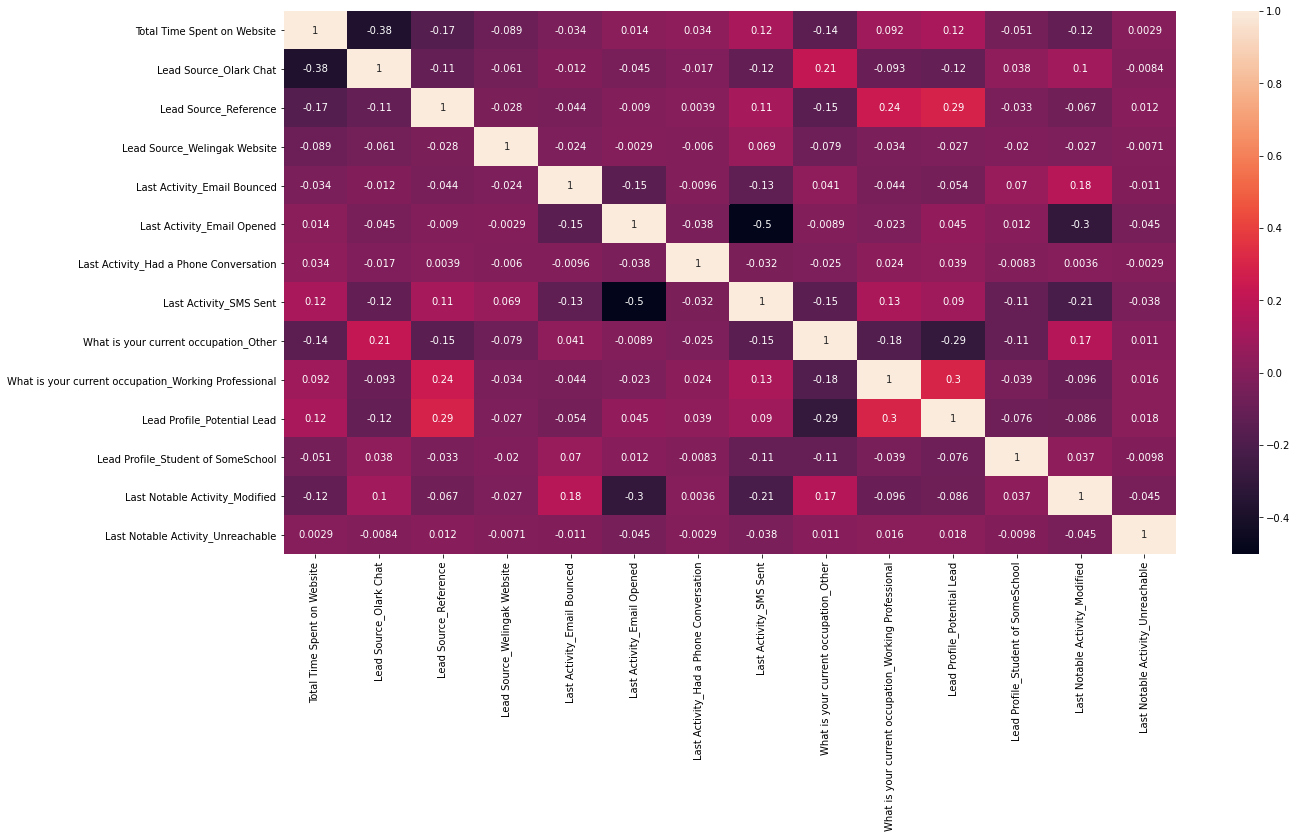

In [110]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

### Metrics beyond simply accuracy

In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7238421955403087

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.8890653958167858

In [114]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11093460418321419


In [115]:
# positive predictive value 
print (TP / float(TP+FP))

0.8011390602752729


In [116]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8390804597701149


### Plotting the ROC Curve¶
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

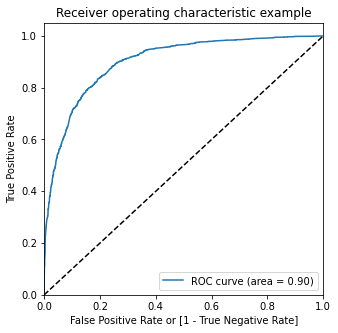

In [119]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [120]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0           1         0.997287    4771          1    1    1    1    1    1   
1           1         0.831125    1722          1    1    1    1    1    1   
2           0         0.152683    6385          0    1    1    0    0    0   
3           0         0.346292    8169          0    1    1    1    1    0   
4           0         0.037596    5543          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1  
1    1    1    1    1    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [121]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381732  1.000000  0.000000
0.1   0.1  0.654935  0.972985  0.458565
0.2   0.2  0.776395  0.919383  0.688112
0.3   0.3  0.807988  0.852487  0.780514
0.4   0.4  0.825994  0.785163  0.851205
0.5   0.5  0.825994  0.723842  0.889065
0.6   0.6  0.813390  0.638508  0.921366
0.7   0.7  0.799476  0.561321  0.946518
0.8   0.8  0.772631  0.453259  0.969817
0.9   0.9  0.728433  0.310463  0.986497


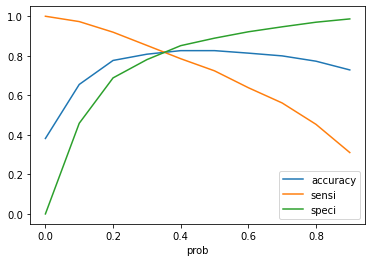

In [122]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.38 is the optimum point to take it as a cutoff probability

In [123]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0           1         0.997287    4771          1    1    1    1    1    1   
1           1         0.831125    1722          1    1    1    1    1    1   
2           0         0.152683    6385          0    1    1    0    0    0   
3           0         0.346292    8169          0    1    1    1    1    0   
4           0         0.037596    5543          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1                1  
1    1    1    1    1    0                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [124]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.8245211982321166

In [125]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)
confusion2

array([[3172,  605],
       [ 467, 1865]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7997427101200686

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.8398199629335451

In [129]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16018003706645487


In [130]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7550607287449392


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8716680406705138


### Precision and Recall

In [132]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
confusion

array([[3358,  419],
       [ 644, 1688]], dtype=int64)

##### Precision

TP / TP + FP

In [133]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8011390602752729

##### Recall

TP / TP + FN

In [134]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7238421955403087

###### Using sklearn utilities for the same

In [135]:
from sklearn.metrics import precision_score, recall_score

In [136]:
precision_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.8011390602752729

In [137]:
recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.7238421955403087

### Precision and recall tradeoff

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
y_train_pred_final.Conversion, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6104    0
 6105    0
 6106    1
 6107    0
 6108    0
 Name: Conversion, Length: 6109, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6104    0
 6105    0
 6106    0
 6107    0
 6108    0
 Name: predicted, Length: 6109, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

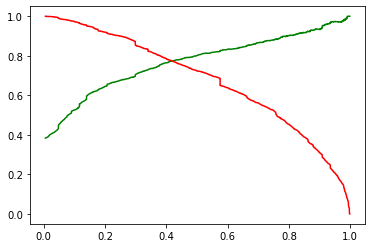

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [142]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3059    -0.269663                    -0.334291             -0.081906   
5869    -0.706169                    -0.878952             -1.279293   
5727     0.385095                     0.479045             -0.279475   
812      2.131117                    -0.862502              0.666461   
8216     0.821601                    -0.814982             -0.441122   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3059                                    1                          0   
5869                                    0                          0   
5727                                    1                          0   
812                                     0                          0   
8216                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3059                        0                           1   
5869                        0                           0   
5727                        0                           1   
812                         0                           0   
8216                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
3059                     0                   0                      0  ...   
5869                     0                   0                      0  ...   
5727                     0                   0                      0  ...   
812                      0                   1                      0  ...   
8216                     0                   1                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
3059                                                0   
5869                                                0   
5727                                                0   
812                                                 0   
8216                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3059                                               0   
5869                                               0   
5727                                               0   
812                                                0   
8216                                               0   

      Last Notable Activity_Modified  \
3059                               0   
5869                               0   
5727                               1   
812                                1   
8216                               0   

      Last Notable Activity_Olark Chat Conversation  \
3059                                              0   
5869                                              1   
5727                                              0   
812                                               0   
8216                                              0   

      Last Notable Activity_Page Visited on Website  \
3059                                              0   
5869                                              0   
5727                                              0   
812                                               0   
8216                                              1   

      Last Notable Activity_Resubscribed to emails  \
3059                                             0   
5869                                             0   
5727                                             0   
812                                              0   
8216                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3059                               0                                  0   
5869                               0                                  0   
5727                               0                                  0   
812                                0                                  0   
8216                 

In [143]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Source_Olark Chat  \
3059                    -0.334291                       0   
5869                    -0.878952                       1   
5727                     0.479045                       0   
812                     -0.862502                       0   
8216                    -0.814982                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3059                      0                             0   
5869                      0                             0   
5727                      0                             0   
812                       0                             0   
8216                      0                             0   

      Last Activity_Email Bounced  Last Activity_Email Opened  \
3059                            0                           1   
5869                            0                           0   
5727                            0                           0   
812                             0                           0   
8216                            0                           0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
3059                                       0                       0   
5869                                       0                       0   
5727                                       0                       1   
812                                        0                       0   
8216                                       0                       0   

      What is your current occupation_Other  \
3059                                      0   
5869                                      0   
5727                                      1   
812                                       0   
8216                                      1   

      What is your current occupation_Working Professional  \
3059                                                  0      
5869                                                  0      
5727                                                  0      
812                                                   0      
8216                                                  0      

      Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
3059                            0                                   0   
5869                            0                                   0   
5727                            0                                   0   
812                             0                                   0   
8216                            0                                   0   

      Last Notable Activity_Modified  Last Notable Activity_Unreachable  
3059                               0                                  0  
5869                               0                                  0  
5727                               1                                  0  
812                                1                                  0  
8216                               0                                  0

In [144]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [145]:
#Making prediction
y_test_pred = res.predict(X_test_sm)

In [146]:
y_test_pred[:10]

3059    0.178369
5869    0.206618
5727    0.246464
812     0.036040
8216    0.028807
378     0.088121
6526    0.758850
2848    0.042439
5826    0.848801
5390    0.978639
dtype: float64

In [147]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head
y_pred_1.head()

0
3059  0.178369
5869  0.206618
5727  0.246464
812   0.036040
8216  0.028807

In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [150]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [151]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [152]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [153]:
y_pred_final.head()

Converted  LeadID         0
0          0    3059  0.178369
1          1    5869  0.206618
2          0    5727  0.246464
3          0     812  0.036040
4          0    8216  0.028807

In [154]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [155]:
y_pred_final.head()

Converted  LeadID  Conversion_Prob
0          0    3059         0.178369
1          1    5869         0.206618
2          0    5727         0.246464
3          0     812         0.036040
4          0    8216         0.028807

In [156]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [157]:
y_pred_final.head()

Converted  LeadID  Conversion_Prob  final_predicted
0          0    3059         0.178369                0
1          1    5869         0.206618                0
2          0    5727         0.246464                0
3          0     812         0.036040                0
4          0    8216         0.028807                0

In [158]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_score

0.819778541428026

In [159]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1382  265]
 [ 207  765]]


In [160]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7870370370370371

In [162]:
# Let us calculate specificity
TN / float(TN+FP)

0.8391013964784456

In [163]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.16089860352155433


In [164]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7427184466019418


In [165]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8697293895531781


In [166]:
#precision
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7427184466019418

In [167]:
#recall
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.7870370370370371

### Test Set:
    Accuracy: 81.97%
    Sensitivity: 78.70%
    Specificity: 83.91%
    False positive rate: 16.08%
    Positive predicitve value: 74.27%
    Negative predictive value: 86.72%
    Precision: 74.27%
    Recall: 78.70%

### Train Set:
    Accuracy: 82.45%
    Sensitivity: 79.97%
    Specificity: 83.98%
    False positive rate: 16.01%
    Positive predicitve value: 75.50%
    Negative predictive value: 87.17%
    Precision: 80.11%
    Recall: 72.38%

### Conclusion:
    
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1. The total time spend on the Website.
2. When the Lead Source was:
   a. Olark Chat
   b. Reference
   c. Welingak Website
3. When the Last Activity was:
   a. SMS sent
   b. Email opened
   c. Email bounced
   d. Had a phone conversation
4. When the Lead Profile was:
   a. Potential lead
   b. Student of a school
5. When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.